In [750]:
import numpy as np 
import os
import pandas as pd 
import time
import datetime
import drms
import urllib
import tqdm
from astropy.time import Time
from datetime import timedelta
import json
import urllib, requests
from astropy.io import fits
from sunpy.coordinates import frames
import sunpy.map
from astropy.coordinates import SkyCoord
from astropy import units

In [ ]:
import sunpy
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import pickle
sun_df = pickle.load(urllib.request.urlopen('https://raw.githubusercontent.com/iknyazeva/FitsProcessing/master/sunspot_1996_2017.pkl'))

In [ ]:
example_fits_url = 'http://jsoc.stanford.edu/data/hmi/fits/2019/03/28/hmi.M_720s_nrt.20190328_190000_TAI.fits'
example_fits_url2 = 'http://jsoc.stanford.edu/data/hmi/fits/2019/03/21/hmi.M_720s_nrt.20190321_190000_TAI.fits'
    
example_fits_data = 'http://jsoc.stanford.edu/data/hmi/fits/'+sun_df.index[1][0].strftime(format='%Y/%m/%d/')+ \
                    '/hmi.M_720s_nrt.'+sun_df.index[1][0].strftime(format='%Y%m%d_%H%M%S')+'_TAI.fits'

example_fits_data.split('/')[-1]

sun_df.index[1][0].strftime(format='%Y%m%d_%H%M%S')
sun_df.index[1][0].strftime(format='%Y/%m/%d/')

In [749]:
plt.get_cmap()

In [ ]:
def show_disk(file, show=True):
    fits_example = file
    hdulist = fits.open(fits_example)
    hdulist[1].verify("fix")
    fits_data =  hdulist[1].data
#     title_ = 'HARP'+ str(harp)+' at '+ str(data_region.strftime('%Y-%m-%d_%H%M'))
    title_ = 'TEST'
    if show:
        plt.figure(figsize = (15,15))
        plt.imshow(fits_data, cmap = plt.get_cmap('hmimag')); plt.title(title_); plt.axis('off')
    return fits_data
#  Colormap Acs is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, 
#     CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, 
#     Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, 
#     RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, 
#     Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, 
#     binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, 
#     flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, 
#     gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hinodesotintensity, hinodexrt, hmimag, hot, hot_r,
#     hsv, hsv_r, inferno, inferno_r, irissji1330, irissji1400, irissji1600, irissji2796, irissji2832, irissji5000, irissjiFUV, irissjiNUV, irissjiSJI_NUV,
#     jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rhessi, 
#     sdoaia131, sdoaia1600, sdoaia1700, sdoaia171, sdoaia193, sdoaia211, sdoaia304, sdoaia335, sdoaia4500, sdoaia94, seismic, seismic_r, sohoeit171, sohoeit195,
#     sohoeit284, sohoeit304, soholasco2, soholasco3, spring, spring_r, stereocor1, stereocor2, stereohi1, stereohi2, summer, summer_r, tab10, tab10_r, tab20,
#     tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, trace1216, trace1550, trace1600, trace1700, trace171, trace195, trace284, traceWL,
#     twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r, yohkohsxtal, yohkohsxtwh

In [ ]:
def rep(a, b, c):
    print(b, c)
urllib.request.urlretrieve('http://jsoc.stanford.edu/data/hmi/fits/2018/02/01/hmi.M_720s.20180201_200000_TAI.fits', 'test2', reporthook=rep)

In [ ]:
show_disk('test')
# fits.open('http://jsoc.stanford.edu/data/hmi/fits/2018/02/01/hmi.M_720s.20180201_200000_TAI.fits')

In [ ]:
# sun_df.loc['2011-04-11':'2011-04-15']
sun_df.loc['2011-04-11':'2011-04-15']

In [ ]:
df_noaa_harp = pd.read_csv('http://jsoc.stanford.edu/doc/data/hmi/harpnum_to_noaa/all_harps_with_noaa_ars.txt',sep=' ')

In [ ]:
df_noaa_harp[df_noaa_harp.HARPNUM=='4864']

In [ ]:
from sunpy.net import Fido, attrs


attrs.jsoc.PrimeKey('HARMNUM', '11185')


res = Fido.search(attrs.jsoc.Time('2011-04-11T00:00:00', '2011-04-12T01:00:00'), attrs.jsoc.Series('hmi.M_720s'), attrs.jsoc.Keys(['TELESCOP', 'INSTRUME', 'T_OBS']))

res

In [9]:
import drms
c = drms.Client(email='metya.tm@gmail.com', verbose=True)

In [116]:
c.series('mdi.fd_M_96', full=True)

,name,note
0,mdi.fd_M_96m_lev182,MDI Full Disk 96m Magnetogram


In [ ]:
# c.query('hmi.sharp_720s', key='T_REC, NOAA_AR, NOAA_NUM, HARPNUM', seg = 'magnetogram')
sorted(c.keys('hmi.Mharp_720s'))

In [ ]:
c.info('hmi.Mharp_720s').segments

In [132]:
# get_example = c.query('mdi.fd_M_96m_lev182[2011-05-01]', pkeys=True)
get_hmi = c.query('hmi.M_720s[2010-05-01]', pkeys=True)
get_hmi

,T_REC,CAMERA
0,2010.05.01_00:00:00_TAI,1


In [15]:
url = 'http://jsoc.stanford.edu'
# urllib.request.urlretrieve(url+get_example[1].loc[0], )
# show_disk(url+get_example[1].loc[0][0])
# plt.plot(240, 260,'o')

In [ ]:
dateRaw = '2011-04-11 00:00:00'
HarpNum = 494

#Надо привести дату к jsoc формату и собрать урл. Если нужны какие-то ключи еще ключи,добавляем их в keys
evTime=datetime.datetime.strptime(dateRaw,'%Y-%m-%d %H:%M:%S')
dates=evTime.strftime('[%Y.%m.%d_%H:%M:%S_TAI]')
#собираем url
url = "http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_info?ds='mdi.fd_M_96m_lev182[{}]{}&op=rs_list&key=&key=NOAA_ARS&seg=data".format(str(HarpNum),dates)
requests.get(url).json()


In [ ]:
ds = 'hmi.M_720s[2014.11.30_00:00_TAI/2h]{continuum, magnetogram}'
# c.query(ds, key='T_REC')
c.info('hmi.M_720s')

In [ ]:

c.export(ds).download('.')

In [ ]:
im = fits.getdata('hmi.sharp_720s.4864.20141130_000000_TAI.magnetogram.fits')
plt.imshow(im)
# plt.imsave('im.png', im)
plt.savefig('imf.png')

In [ ]:
rf = c.export(ds, method='url', protocol='fits')
rf

In [ ]:
rj = c.export(ds, method='url', protocol='jpg')
rj

In [ ]:
attrs.jsoc.AttrWalker

In [ ]:
c.series('mdi', full=True)
c.export()

In [ ]:


my_map = sunpy.map.Map(np.ones([10,10]),{'cdelt1': 10, 'cdelt2': 10, 'telescop':'sunpy'})
my_map.plot()
plt.show()

In [ ]:
SkyCoord(ra=10.625, dec=41.2, frame='icrs', unit='deg')
# frames.Heliocentric()

In [ ]:
from sunpy.data.sample import AIA_171_IMAGE 
m = sunpy.map.Map(AIA_171_IMAGE)

In [ ]:
m.plot(plt.figure(figsize=(10,10)))
plt.show()

In [ ]:
ax.plot_coo

In [ ]:
test_disk = show_disk('test', show=False)

In [ ]:
m = sunpy.map.Map('test')
c = SkyCoord(frame=m.coordinate_frame)
# ax = plt.subplot(projection=m)  # doctest: +REMOTE_DATA
plt.figure(figsize=(10,10))
m.plot()  # doctest: +REMOTE_DATA
# ax.plot_coord(c, 'o')  # doctest: +REMOTE_DATA

In [527]:
DC.query('hmi.M_720s[2011.04.11_00:00_TAI/2h]', seg='magnetogram', pkeys=True)

(                     T_REC  CAMERA
 0  2011.04.11_00:00:00_TAI       1
 1  2011.04.11_00:12:00_TAI       1
 2  2011.04.11_00:24:00_TAI       1
 3  2011.04.11_00:36:00_TAI       1
 4  2011.04.11_00:48:00_TAI       1
 5  2011.04.11_01:00:00_TAI       1
 6  2011.04.11_01:12:00_TAI       1
 7  2011.04.11_01:24:00_TAI       1
 8  2011.04.11_01:36:00_TAI       1
 9  2011.04.11_01:48:00_TAI       1,
                                 magnetogram
 0  /SUM7/D157434620/S00003/magnetogram.fits
 1  /SUM7/D157434620/S00004/magnetogram.fits
 2  /SUM7/D157434620/S00005/magnetogram.fits
 3  /SUM7/D157434620/S00006/magnetogram.fits
 4  /SUM7/D157434620/S00007/magnetogram.fits
 5  /SUM7/D157434620/S00008/magnetogram.fits
 6  /SUM7/D157434620/S00009/magnetogram.fits
 7  /SUM7/D157434620/S00010/magnetogram.fits
 8  /SUM7/D157434620/S00011/magnetogram.fits
 9  /SUM7/D157434620/S00012/magnetogram.fits)

In [755]:
m = sunpy.map.Map('test2011')

In [ ]:
plt.figure(figsize=(10,10))
coord = SkyCoord(17*units.deg, 8*units.deg, frame=m.coordinate_frame)
# m.plot()
# ax = plt.subplot(projection=m)
# m.plot(cmap='hmimag')
# ax.plot_coord(coord, 'o')
dir(coord)


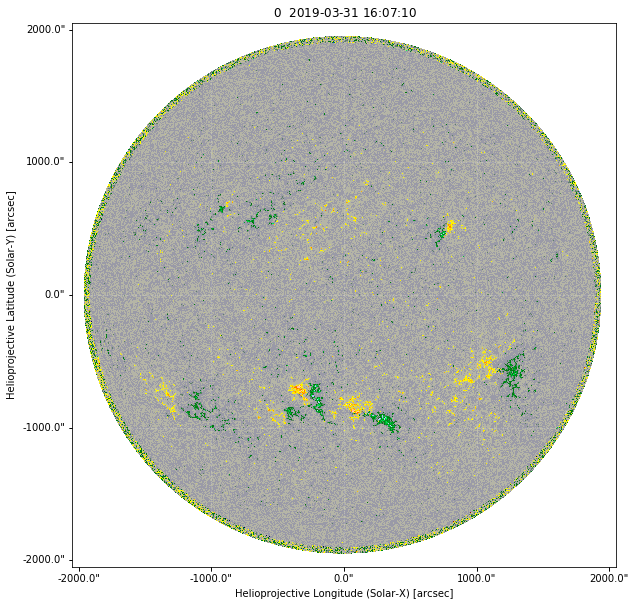

In [758]:
plt.figure(figsize=(10,10))
m.plot(cmap='hmimag')

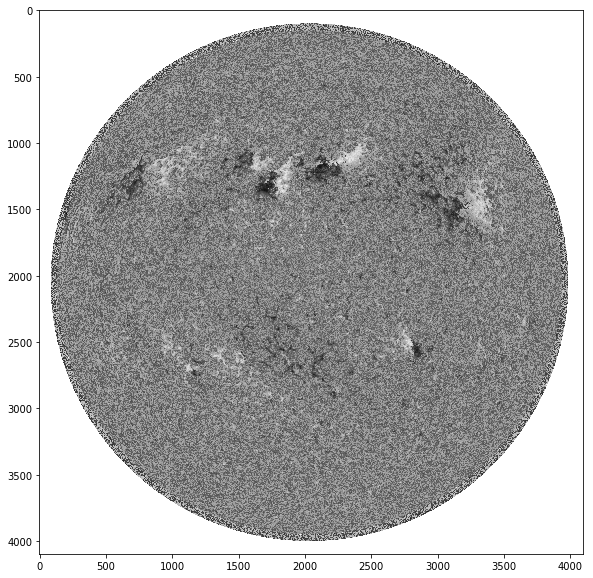

In [759]:
plt.figure(figsize=(10,10))
rev_m = np.sign(m.data)*np.log1p(np.abs(m.data))
plt.imshow(rev_m, cmap='gray');

In [ ]:
import sunpy.wcs
# SkyCoord(23, 12, frame='helioprojective')
nc = sunpy.wcs.convert_hg_hpc(17, 8)
# m.world_to_pixel(m, )
fr = SkyCoord(nc[0], nc[1], unit='arcsec', frame=m.coordinate_frame)
 
# m.submap(fr)

In [ ]:
nc = SkyCoord(17, 8, unit='deg', frame=m.coordinate_frame)
m.draw_rectangle(nc, 500*units.deg, 500*units.deg)


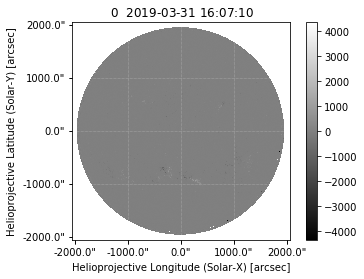

In [767]:
sunpy.wcs.convert_hg_hpc(17,8)

In [773]:
def bbox(lon, lat, arcsec):
    x, y = sunpy.wcs.convert_hg_hpc(17,8, b0_deg=-6)
    minlat = y - arcsec
    maxlat = y + arcsec
    minlon = x - arcsec
    maxlon = x + arcsec
#     bl = sunpy.wcs.convert_hg_hpc(minlon, minlat)
#     tr = sunpy.wcs.convert_hg_hpc(maxlon, maxlat)
    return [minlon, minlat, maxlon, maxlat]
ll = bbox(17, 8, 1000)
bottom_left =SkyCoord(bl[0]*units.arcsec, bl[1]*units.arcsec, frame="helioprojective")
top_right = SkyCoord(tr[0]*units.arcsec, tr[1]*units.arcsec, frame="helioprojective")

b_l = SkyCoord(ll[0], ll[1], unit='arcsec', frame="helioprojective")
t_r = SkyCoord(ll[2], ll[3], unit='arcsec', frame="helioprojective")

# m.submap(b_l, t_r).peek(cmap='gray')


XTENSION= 'IMAGE   '                                                            
BITPIX  =                   32                                                  
NAXIS   =                    2                                                  
NAXIS1  =                 4096                                                  
NAXIS2  =                 4096                                                  
PCOUNT  =                    0                                                  
GCOUNT  =                    1                                                  
BLANK   =          -2147483648                                                  
BZERO   =                  0.0                                                  
BSCALE  =                  0.1                                                  
CHECKSUM= '6HDA9GA16GA86GA8'                                                    
DATASUM = '417502163'                                                           
WAVEUNIT= ''                

SunPy Map
---------
Observatory:		 
Instrument:		 
Detector:		 
Measurement:		 0.0
Wavelength:		 0.0
Observation Date:	 2019-03-31 16:07:10
Exposure Time:		 0.000000 s
Dimension:		 [4096. 4096.] pix
Coordinate System:	 helioprojective
Scale:			 [1. 1.] arcsec / pix
Reference Pixel:	 [2048.5 2048.5] pix
Reference Coord:	 [0. 0.] arcsec
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [ ]:
m.peek(size=(20,20))

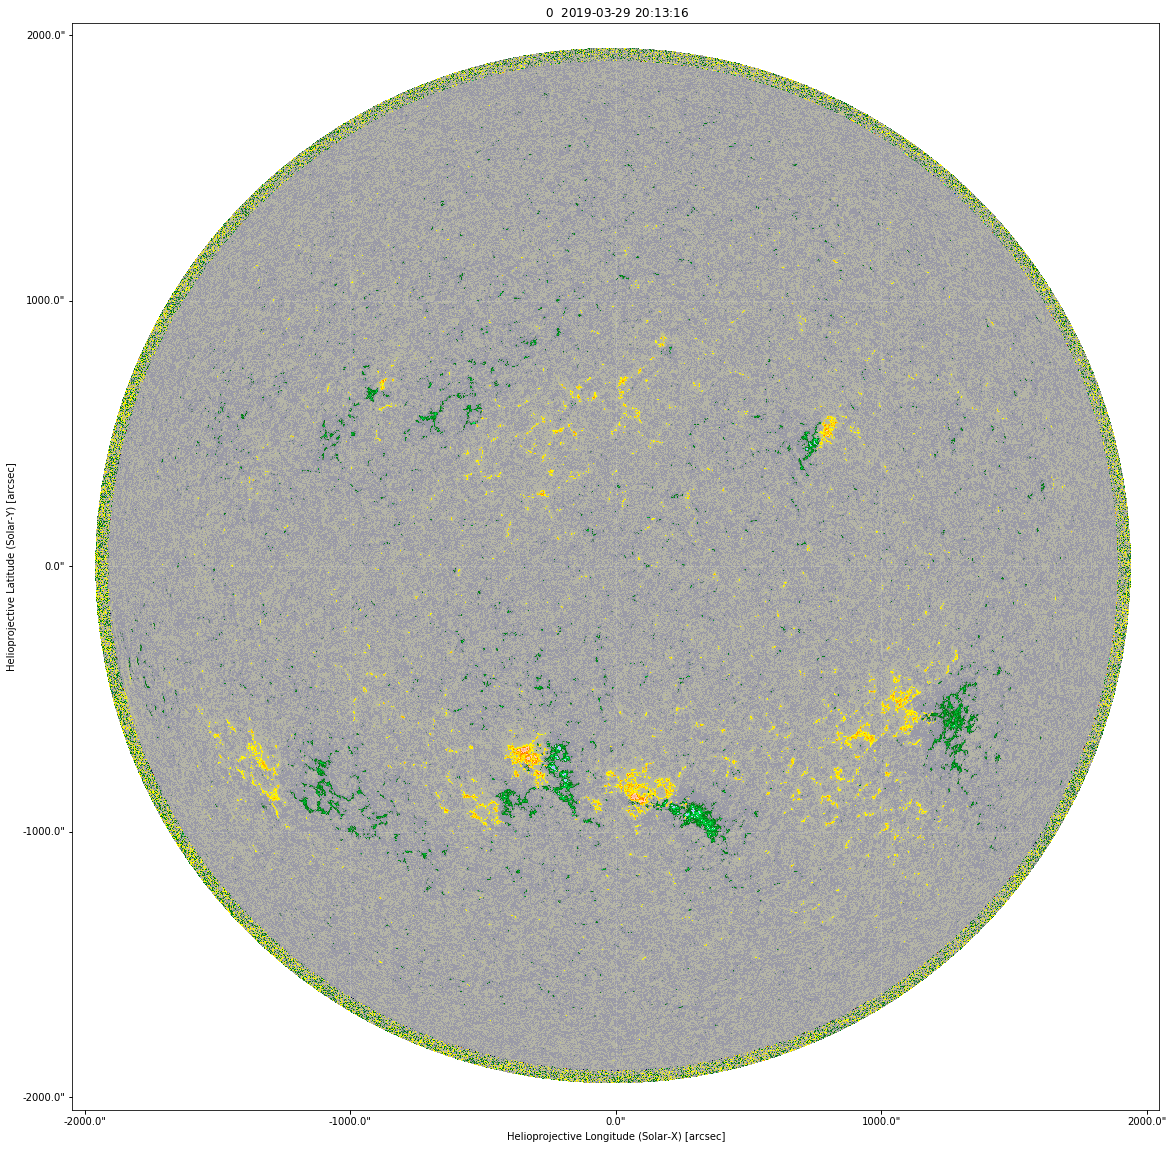

In [546]:
plt.figure(figsize=(20,20))
m.plot(cmap='hmimag')

In [ ]:
sunpy.map.GenericMap??

In [45]:
from astropy.io import fits
with fits.open('test2011_onemore') as fit:
    for each in fit:
        print(dir(each))
        print('\n')
        print(each.header)
# m = sunpy.map.Map('dataset/hmi.m_720s.20110304_000000_TAI.1.magnetogram.fits')

['_EXCLUDE', '_MASK', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_axes', '_bitpix', '_blank', '_bscale', '_buffer', '_bzero', '_calculate_checksum', '_calculate_datasum', '_char_encode', '_checksum', '_checksum_valid', '_close', '_compute_checksum', '_compute_hdu_checksum', '_convert_pseudo_unsigned', '_data_loaded', '_data_needs_rescale', '_data_offset', '_data_replaced', '_data_size', '_datasum', '_datasum_valid', '_default_name', '_do_not_scale_image_data', '_dtype_for_bitpix', '_encode_byte', '_file', '_gcount', '_get_raw_data', '_get_scaled_image_data', '_get_timestamp', '_has_data', '_hdu_registry', '_header', '_header_offset', '_modified', '_new', '_orig_bitpix', '_orig_blank', '_or

(33.00296275124019, 183.81710289677278)
(214.44212645800562, 376.25848057038644)
<SkyCoord (Helioprojective: obstime=None, rsun=695508.0 km, observer=earth): (Tx, Ty) in arcsec
    (33.00296275, 183.8171029)>
<SkyCoord (Helioprojective: obstime=None, rsun=695508.0 km, observer=earth): (Tx, Ty) in arcsec
    (214.44212646, 376.25848057)>
(0, 0)


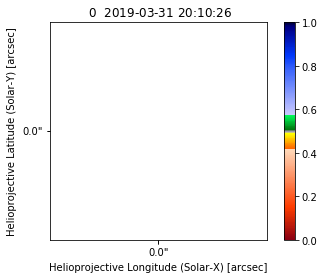

In [785]:
def show_region(lat, lon, size_in_deg):
    min_lon = lon - size_in_deg
    max_lon = lon + size_in_deg
    min_lat = lat - size_in_deg
    max_lat = lat + size_in_deg
    bl = sunpy.wcs.convert_hg_hpc(min_lon, min_lat)
    print(bl)
    tr = sunpy.wcs.convert_hg_hpc(max_lon, max_lat)
    print(tr)
    bottom_left = SkyCoord(bl[0]*units.arcsec, bl[1]*units.arcsec, frame='helioprojective')
    top_right = SkyCoord(tr[0]*units.arcsec, tr[1]*units.arcsec, frame='helioprojective')
#     bottom_left = SkyCoord(min_lat, min_lat, unit='deg', frame=m.coordinate_frame)
#     top_right = SkyCoord(max_lat, max_lat, unit='deg', frame=m.coordinate_frame)
    print(bottom_left)
    print(top_right)
    submap = m.submap(bottom_left, top_right)
    submap.peek(cmap='hmimag')
    print(submap.data.shape)
show_region(17, 8, 6)

SunPy Map
---------
Observatory:		 
Instrument:		 
Detector:		 
Measurement:		 0.0
Wavelength:		 0.0
Observation Date:	 2019-03-31 16:22:51
Exposure Time:		 0.000000 s
Dimension:		 [4096. 4096.] pix
Coordinate System:	 helioprojective
Scale:			 [1. 1.] arcsec / pix
Reference Pixel:	 [2048.5 2048.5] pix
Reference Coord:	 [0. 0.] arcsec
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

SyntaxError: invalid syntax (<ipython-input-6-d82f8e0ad7ca>, line 1)

In [31]:
import sunpy.map
erpop = sunpy.map.Map('test2011_onemore')

In [33]:
erpop.

MetaDict([('xtension', 'IMAGE'),
          ('bitpix', 32),
          ('naxis', 2),
          ('naxis1', 4096),
          ('naxis2', 4096),
          ('pcount', 0),
          ('gcount', 1),
          ('blank', -2147483648),
          ('bzero', 0.0),
          ('bscale', 0.1),
          ('checksum', '6HDA9GA16GA86GA8'),
          ('datasum', '417502163'),
          ('comment', ''),
          ('history', ''),
          ('waveunit', None)])

In [101]:
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import astropy.units as u
import sunpy.wcs
# print(sunpy.wcs.convert_hg_hpc(17, 8))
# co = SkyCoord(17*u.arcsec, 8*u.arcsec, frame=erpop.coordinate_frame)
# print(erpop.world_to_pixel(co))

# erpop.coordinate_frame

# np.argwhere(erpop.data == np.nanmax(erpop.data))*u.pixel
plt.figure(figsize=(20,20))
# plt.imshow(erpop.data[2000:2100, 2000:2100])

# erpop.plot(cmap.)

erpop.pixel_to_world(*u.arcsec, *u.arsec)

AttributeError: module 'astropy.units' has no attribute 'arsec'

<Figure size 1440x1440 with 0 Axes>